# STATISTICS CLASS NOTES

WHAT IS STATISTICS OR STATS?

------> IN SIMPLE WORDS STATISTICS OR STATS IS THE STUDY OF THE SAMPLES WHICH IS BEING TREATED AS POPULATIONS. STATS IS DEVIVED INTO TWO PART DESCRIPTIVE AND INFERENTIAL.

# Introduction to basic Statistics terms
• Population: A collection, or set, of individuals or objects or events whose properties are to be analyzed ( Raw data that we get from the client).

• Sample: A subset of the population. It should be representative of the population.

• Variable: A characteristic of each element of a population or sample.

• Data (singular): The value of the variable associated with one element of a population or sample. This value may be a number, a word, or a symbol.

• Data (plural): The set of values collected for the variable from each of the elements belonging to the sample.

• Experiment: A planned activity whose results yield a collection of data.

• Parameter: A numerical value summarizing all the data of an entire population (Mean, Median, Mode).

• Statistic: A numerical value summarizing the sample data.


# DESCRIPTIVE STATS

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import statsmodels
from statsmodels.stats.weightstats import ztest as zt

In [2]:
df= sns.load_dataset("iris")
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
df["sepal_length"].mean()

5.843333333333334

In [7]:
df["sepal_length"].min()

4.3

In [8]:
df["sepal_length"].std()

0.828066127977863

In [9]:
df["sepal_length"].mode()

0    5.0
Name: sepal_length, dtype: float64

In [10]:
df["sepal_length"].var()

0.6856935123042507

In [11]:
# HOW TO CALCULATE RANGE

range=df["sepal_length"].max()-df["sepal_length"].min()
range

3.6000000000000005

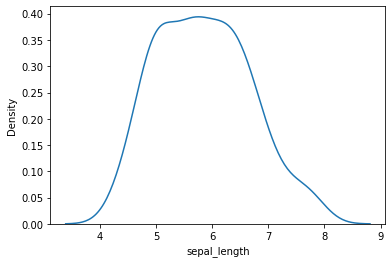

In [12]:
# kde- kernel density plot
sns.kdeplot(df["sepal_length"]);

In [13]:
df["sepal_length"].skew()  # Right skew

0.3149109566369728

In [14]:
import pylab

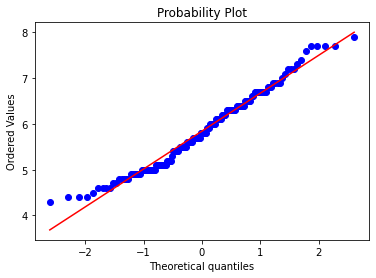

In [15]:
# QQ PLOT I.E QUANTILE-QUANTILE PLOT
st.probplot(df["sepal_length"],dist="norm", plot=pylab);

In [16]:
h = pd.Series([120,120.5,121,120.8,130])
h

0    120.0
1    120.5
2    121.0
3    120.8
4    130.0
dtype: float64

In [17]:
m=h.mean()

In [18]:
s=h.std()

In [19]:
# HOW TO DO STANDARDISATION
l = []
for i in h :
  z = (i-m)/s
  l.append(z)
arr = np.array(l)
print(round(arr.mean(),2))
print(round(arr.std(),1))

0.0
0.9


In [20]:
d=pd.Series([.92,0,0.45,1,.23])
d

0    0.92
1    0.00
2    0.45
3    1.00
4    0.23
dtype: float64

In [21]:
print(d.mean())
print(d.std())

0.52
0.43295496301578534


In [22]:
# HOW TO DO NORMALISATION.
a = pd.Series([80.2,60.5,70.3,81.9,65.5])
min = a.min()
max = a.max()
for i in a:
  n = (i-min)/(max-min)
  print(n)

0.9205607476635513
0.0
0.45794392523364463
1.0
0.23364485981308405


In [23]:
# to check the skewness in the data
df.skew()  


sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [24]:
# to know the kurtosis in the data

df.kurtosis()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [25]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\bloodpressure.csv")
df.head(3)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168


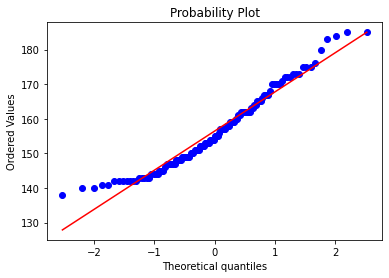

In [26]:
st.probplot(df["bp_before"], dist="norm", plot= pylab);

In [27]:
df["bpb"]=np.log(df["bp_before"])

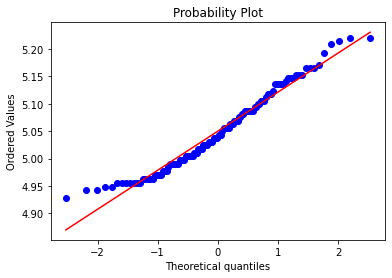

In [28]:
st.probplot(df["bpb"], dist="norm", plot= pylab);

In [29]:
df["bpb"]=np.exp(df["bp_before"])

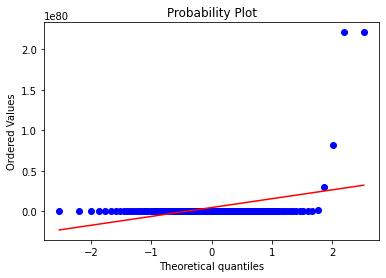

In [30]:
st.probplot(df["bpb"], dist="norm", plot= pylab);

In [31]:
x=st.boxcox(df["bp_before"])
x

(array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
        0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
        0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
        0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
        0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
        0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
        0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
        0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ,
        0.3344831 , 0.3344831 , 0.33448311, 0.3344831 , 0.33448313,
        0.33448309, 0.33448312, 0.3344831 , 0.33448312, 0.33448312,
        0.33448312, 0.33448312, 0.33448312, 0.33448312, 0.33448312,
        0.33448311, 0.33448308, 0.33448309, 0.33448312, 0.33448311,
        0.33448309, 0.33448308, 0.33448307, 0.33448307, 0.3344831 ,
        0.33448308, 0.33448309, 0.33448309, 0.33448308, 0.33448305,
        0.33448311, 0.3344831 , 0.33448306, 0.33

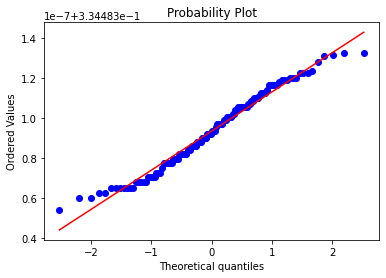

In [32]:
st.probplot(x[0], dist="norm", plot= pylab);

In [33]:
x_bar  = df["bp_before"].mean()
y_bar  = df["bp_after"].mean()
x11,x22 = [],[]
for i in df["bp_before"]:
  x1 = i-x_bar
  x11.append(x1)
for j in df["bp_after"]:
  x2 = j-y_bar
  x22.append(x2)
cov = (np.array(x11)*np.array(x22)).sum()/(df.shape[0]-1)
cov

25.694537815126054

In [34]:
sigma_x = df["bp_before"].std()
sigma_y = df["bp_after"].std()

In [35]:
cov/(sigma_x*sigma_y)

0.15911810291010767

In [36]:
df

,patient,sex,agegrp,bp_before,bp_after,bpb
0,1,Male,30-45,143,153,1.270899e+62
1,2,Male,30-45,163,170,6.165958e+70
2,3,Male,30-45,153,168,2.799341e+66
3,4,Male,30-45,153,142,2.799341e+66
4,5,Male,30-45,146,141,2.552668e+63
...,...,...,...,...,...,...
115,116,Female,60+,152,152,1.029820e+66
116,117,Female,60+,161,152,8.344716e+69
117,118,Female,60+,165,174,4.556061e+71
118,119,Female,60+,149,151,5.127171e+64


In [37]:
df1 = sns.load_dataset("iris")

In [38]:
df.corr(method = "spearman")

,patient,bp_before,bp_after,bpb
patient,1.000000,-0.040663,-0.041343,-0.040663
bp_before,-0.040663,1.000000,0.153100,1.000000
bp_after,-0.041343,0.153100,1.000000,0.153100
bpb,-0.040663,1.000000,0.153100,1.000000


# INFERENTIAL STATS :

INFER MEANS TO CONCLUDE

# Z- Test:

When to apply Z-Test :

1. When Data is normally distributed.

2. The number of sample size should be more than 30.

3. Sample mean should be known.

4. Population standard deviation should be known.

In [39]:
help(zt)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

In [40]:
df2=pd.read_csv("C:\\Users\\user\\Downloads\\bloodpressure.csv")
df2

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


How to test one sample :

In [41]:
df2["bp_before"].mean()

156.45

In [42]:
x1 = df2["bp_before"][0:40]
len(x1)

40

In [43]:
x1_mean = x1.mean()

In [44]:
x1_mean

156.25

In [45]:
x1_std = x1.std()
x1_std

11.443842818806035

In [46]:
n = 40

In [47]:
z_val,p_val = zt(x1,value = 156,alternative = "two-sided")

In [48]:
z_val

0.1381650250810727

In [49]:
p_val

0.890109995889419

In [50]:
alpha = 0.05
if p_val<alpha:
  print("reject null hypo")
else:
  print("accept null hypo")

accept null hypo


In [51]:
ci_neg = x1.mean() - z_val*(x1.std()/np.sqrt(n))
ci_pos = x1.mean() + z_val*(x1.std()/np.sqrt(n))
ci_neg,ci_pos

(156.0, 156.5)

In [52]:
x2 = df2["bp_after"][0:40]
x2

0     153
1     170
2     168
3     142
4     141
5     147
6     133
7     141
8     131
9     125
10    164
11    159
12    135
13    159
14    153
15    126
16    162
17    134
18    136
19    150
20    168
21    155
22    136
23    132
24    160
25    160
26    136
27    183
28    152
29    162
30    151
31    139
32    175
33    184
34    151
35    171
36    157
37    159
38    140
39    174
Name: bp_after, dtype: int64

In [53]:
x2.mean()

151.85

In [54]:
x1.mean()-x2.mean()

4.400000000000006

How to test two sample:-

In [55]:
z_val , p_val = zt(x1,x2,value = 50,alternative = "two-sided")
print(z_val)
print(round(p_val,2))
alpha = 0.05
if p_val<alpha:
  print("reject Null Hypo")
else:
  print("Accept Null hypo")

-14.890047164888633
0.0
reject Null Hypo


# T - test :

n<30 and pop var unknown and normality of distribution 


In [56]:
x = np.random.normal(loc = 30,scale = 5,size = 100)
x

array([29.68099576, 25.7348967 , 34.15690908, 20.5738923 , 30.23395161,
       22.58227349, 20.91747783, 34.95129434, 34.25970699, 30.43459266,
       38.17304902, 30.33056846, 28.02478188, 36.26821842, 39.46449305,
       29.21464489, 30.75841341, 22.28769498, 31.00942874, 20.94255987,
       33.28377432, 31.31549689, 29.9265726 , 30.54114165, 29.98060785,
       31.99509463, 27.03842877, 31.56078942, 28.60328811, 34.03962803,
       27.38735013, 30.79221772, 29.25590078, 35.00799883, 24.84637711,
       23.17777296, 32.68551541, 38.20981363, 33.53782452, 26.36142744,
       28.83196121, 32.28560387, 32.62116655, 41.0229927 , 31.17890806,
       23.90166552, 34.28022106, 25.41928779, 31.69082595, 24.72457652,
       30.61409558, 31.85980151, 24.4447146 , 28.09198445, 28.00237608,
       25.99723728, 22.82365348, 25.89282602, 16.69490666, 28.70210429,
       30.68539108, 36.01801457, 27.60806123, 30.20916903, 24.34174821,
       29.5956999 , 31.27752287, 31.43914936, 27.47449501, 43.34

In [57]:
pd.Series(x).skew()

0.12284114501567527

In [58]:
pd.Series(x).kurtosis()

0.2340779770571766

In [59]:
x1 = x[90:100]

In [60]:
x1

array([28.65609003, 30.46402626, 33.97231972, 28.84617477, 28.19042021,
       20.26845089, 26.78068559, 32.774858  , 36.58770705, 32.68941487])

In [61]:
x1.mean()

29.92301473675231

In [62]:
t_val , p_val = st.ttest_1samp(x1,x.mean())
print(t_val,":",p_val)

0.17327214057643434 : 0.8662718982034089


In [63]:
# Two sample t-test

In [64]:
x1= df2["bp_before"][0:40]
x2= df2["bp_after"][0:40]

In [65]:
t_value, p_value=st.stats.ttest_rel(x1,x2)
print(t_value)
print(p_value)
if p_value<0.05:
    print("Reject null hypothesis")
    
else:
    print("accept null hypothesis")

1.3347010727377813
0.18971431308295203
accept null hypothesis


# CHI- SQUARE TEST

In [66]:
data= sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [67]:
obs_table=pd.crosstab(data["sex"],data["smoker"])
obs_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [68]:
v=st.chi2_contingency(obs_table)

In [69]:
v

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [70]:
if v[1]<0.05:
    print("Reject null hypothesis.")
    
else:
    print("Accept null hypothesis.")

Accept null hypothesis.


# ANOVA OR F-TEST :

In [71]:
df3=sns.load_dataset("iris")
df3.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [72]:
df_anova= df3[["petal_width","species"]]

In [73]:
df_anova.index

RangeIndex(start=0, stop=150, step=1)

In [74]:
grps= pd.unique(df_anova.species.values)
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [75]:
d_data = {grp: df_anova["petal_width"][df_anova.species==grp]for grp in grps}

In [76]:
F, p= st.f_oneway(d_data["setosa"], d_data["versicolor"], d_data["virginica"])

In [77]:
print(round(p,4))

0.0


In [78]:
if p<0.05:
    print("reject null hypothesis")
    
else:
    print("accept null hypothesis")

reject null hypothesis


In [79]:
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
a=df3.corr()

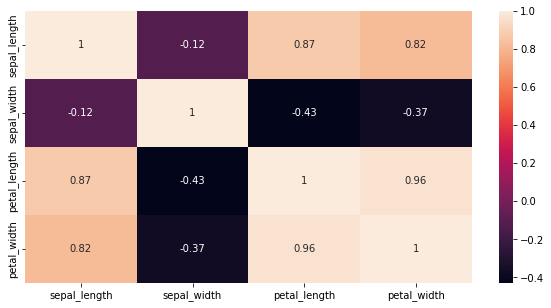

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True);